In [56]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)

import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import plotly.express as px

In [57]:

df_All_1 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_1o2.csv')
df_All_2 = pd.read_csv(r'C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\1 Preprocess\Merge Data\contData_all_Avg_2o2.csv')
# Concatenate (union) the dataframes
df_All = pd.concat([df_All_1, df_All_2], ignore_index=True)

print(df_All.head())

   425_pct_Al  M_Value  C4_pct_Eth  C4_pct_H2O  HydWtr_pct_Ammonia   DI55152  \
0    6.307630  3.50893    2.508420    21.96340            0.908765  0.925255   
1    6.308335  3.50863    2.511135    21.96865            0.907643  0.924281   
2    6.309390  3.50818    2.515210    21.97655            0.905959  0.923773   
3    6.310090  3.50788    2.517925    21.98185            0.904837  0.924103   
4    6.310790  3.50758    2.520640    21.98715            0.903715  0.924258   

    FC55003       FC55552      FC55569  FFC55553  FFC55555    LC55555  \
0  4919.290  41564.100000  6918.110000  0.996975  0.751501  59.968800   
1  5039.445  41558.250000  6919.960000  0.998847  0.750588  59.932300   
2  5268.620  41524.066667  6916.486667  0.998648  0.750505  60.002433   
3  5349.320  41500.275000  6918.470000  1.000349  0.750325  60.015925   
4  5563.165  41466.625000  6915.790000  1.000862  0.750021  60.020500   

    PI55004   TC55552     TI55021    Butanol  
0  1.306310  177.1880  212.861000

In [58]:

TagDesc = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\GitRepo\Project-OptiC4\CSV\Not for Processing\TagDesc.csv")
# df_All = pd.read_csv(r"C:\Users\saust\OneDrive - Sasol\1 Project rC4\Jupyter Notebooks\Report 10-19-23\df_AlConCD554.csv")
#df_All = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\df_CDFI.csv")


# FScore = pd.read_csv(r"C:\Users\saust\OneDrive\Desktop\CodeSpace DLs\102423\Project rC4\5 Engineered Features\3 - EF - Feature Selection\FScore_on_Butanol_310.csv")

# df_All = pd.read_csv('/workspaces/codespaces-jupyter/ProjectrC4/df_AlConCD554.csv')

In [59]:
# # List of columns to exclude to run XGboost feature selection
# exclude_columns = [
       
#        # Sample data of the same time introcuces Data leakage
#        'Octanol', 'Hexanol', 'Ethanol', 'Decanol',

#        # Highly correlated to TC's
#        # "Normally the Exctraction temperature is run within a few degrees of the hydrolysis temperature."(Alumina Unit Effect p10) 
#        'TI52014', 'TI55013', 'TI55014', 'TI55015', 'TI55016', 'TI55017', 'TI55023', 'TI40050',

#        # , 'TI55021'
       
#        # Niro Functions
#        'TC52015', 'FC52018', 'II52554', 'VI52558B',
       
#        # .9 to .8 Correlations
#        'FC55555',  # First Drop - Highest correlated variable    #Almost 1 with FC55552 - as determined by Ratio controller    
#        'PI55560',   # Exlude middle pressure - Include -> PI5500: btm pressure 
#        'FYC55553',  # Calculates by other varibales (inherently correlated) - Include -> FC55552 - leading influecner 
#        'FC55152', 'FC55102', # Both are deritives of FC55552
#        'AYC55580',  # Is calculated - DI55580 measures the process directly
       
#        # .7 Correlations
#        # FC55552 --> FC42428 = 0.70526 / not comfortable droping either at this time

#        # .6 Correlations
#        'TC55566',  # Slurry coolers are a Downstream requirement - TC55552 occurs upstream (DC-551 ALKOX  FD PREHEAT)

#        # .5 Correlations
#        'FC55009' # Receives its SP from TC55553

#                    ]

# # Create a new DataFrame without the excluded columnsd
# df_All = df_All.drop(columns=exclude_columns)

# Check Basic Information:

In [60]:


df_All.info() #to check the data types, non-null counts, and memory usage.
df_All.head() #to examine the first few rows of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56390 entries, 0 to 56389
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   425_pct_Al          56390 non-null  float64
 1   M_Value             56390 non-null  float64
 2   C4_pct_Eth          56390 non-null  float64
 3   C4_pct_H2O          56390 non-null  float64
 4   HydWtr_pct_Ammonia  56390 non-null  float64
 5   DI55152             56390 non-null  float64
 6   FC55003             56390 non-null  float64
 7   FC55552             56390 non-null  float64
 8   FC55569             56390 non-null  float64
 9   FFC55553            56390 non-null  float64
 10  FFC55555            56390 non-null  float64
 11  LC55555             56390 non-null  float64
 12  PI55004             56390 non-null  float64
 13  TC55552             56390 non-null  float64
 14  TI55021             56390 non-null  float64
 15  Butanol             56390 non-null  float64
dtypes: f

,425_pct_Al,M_Value,C4_pct_Eth,C4_pct_H2O,HydWtr_pct_Ammonia,DI55152,FC55003,FC55552,FC55569,FFC55553,FFC55555,LC55555,PI55004,TC55552,TI55021,Butanol
0,6.307630,3.50893,2.508420,21.96340,0.908765,0.925255,4919.290,41564.100000,6918.110000,0.996975,0.751501,59.968800,1.306310,177.1880,212.861000,54.858300
1,6.308335,3.50863,2.511135,21.96865,0.907643,0.924281,5039.445,41558.250000,6919.960000,0.998847,0.750588,59.932300,1.181220,177.2505,212.699000,51.190050
2,6.309390,3.50818,2.515210,21.97655,0.905959,0.923773,5268.620,41524.066667,6916.486667,0.998648,0.750505,60.002433,1.216603,177.4170,212.822333,48.744567
3,6.310090,3.50788,2.517925,21.98185,0.904837,0.924103,5349.320,41500.275000,6918.470000,1.000349,0.750325,60.015925,1.206718,177.4590,212.799750,46.604750
4,6.310790,3.50758,2.520640,21.98715,0.903715,0.924258,5563.165,41466.625000,6915.790000,1.000862,0.750021,60.020500,1.163892,177.5490,212.853000,44.587220


# Summary Statistics:

In [61]:


df_All.describe() #to get summary statistics for numeric columns.


,425_pct_Al,M_Value,C4_pct_Eth,C4_pct_H2O,HydWtr_pct_Ammonia,DI55152,FC55003,FC55552,FC55569,FFC55553,FFC55555,LC55555,PI55004,TC55552,TI55021,Butanol
count,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000,56390.000000
mean,6.111431,3.604671,1.288459,20.732024,0.968766,0.944868,5942.937622,36148.032931,6596.636662,0.993235,0.774738,58.799548,2.277041,168.524551,223.213167,9.544883
std,0.320365,0.172066,0.705428,2.861318,0.145111,0.043131,791.822524,4240.706992,371.398963,0.039962,0.023119,10.599735,1.198043,14.978153,8.797813,9.451850
min,0.252306,1.461875,0.086948,7.932310,0.390025,0.815428,2991.532500,18869.325000,5192.802500,0.814484,0.697983,39.179775,0.031410,120.497500,207.956750,0.424417
25%,5.985006,3.507271,0.681404,18.310450,0.877197,0.915588,5444.710625,35004.118750,6367.107500,0.969975,0.759845,49.929306,1.322199,156.055250,217.939000,3.660641
50%,6.129580,3.596178,1.299502,20.678075,0.942339,0.939580,5958.680000,37874.750000,6577.327500,0.991165,0.779151,60.116213,2.036633,171.937125,220.944750,5.804167
75%,6.269913,3.696815,1.727776,22.972850,1.036024,0.966767,6485.384375,38974.875000,6805.105000,1.011792,0.790104,67.949369,3.060584,180.593875,224.788125,11.233729
max,8.020685,5.827565,8.711360,33.731050,1.598385,1.064850,8892.395000,42079.525000,8045.972500,1.153682,0.855093,79.265400,6.313537,212.425000,256.500500,56.575000


# Check for Missing Values:

In [62]:


df_All.isnull().sum() #to check the number of missing values in each column.


425_pct_Al            0
M_Value               0
C4_pct_Eth            0
C4_pct_H2O            0
HydWtr_pct_Ammonia    0
DI55152               0
FC55003               0
FC55552               0
FC55569               0
FFC55553              0
FFC55555              0
LC55555               0
PI55004               0
TC55552               0
TI55021               0
Butanol               0
dtype: int64

# Correlation Analysis:

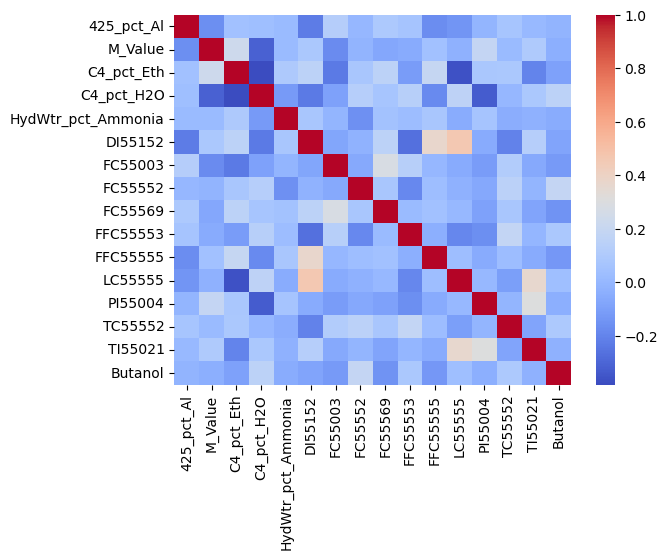

In [63]:
correlation_matrix = df_All.corr(numeric_only = True)

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()
# Calculate and visualize correlations between numeric variables using a correlation matrix or heatmap.
# Identify strong positive/negative correlations.

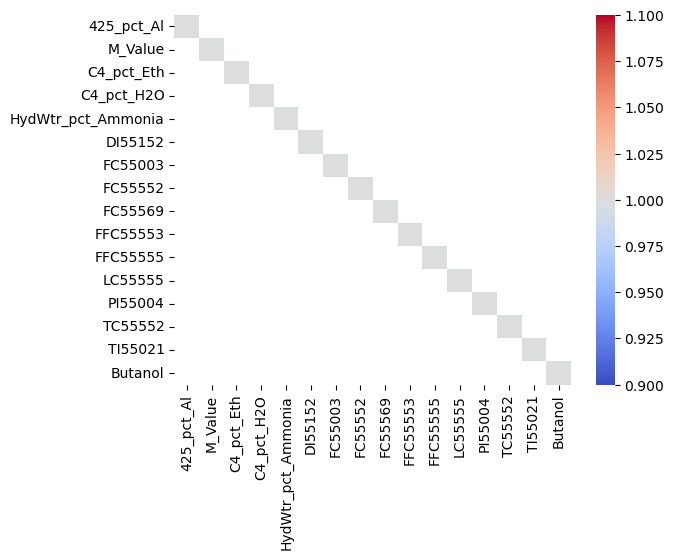

In [64]:
strong_corr = correlation_matrix[abs(correlation_matrix) > 0.5]

sns.heatmap(strong_corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.show()

In [65]:
threshold = 0.9
correlation_matrix = df_All.corr(numeric_only=True)
correlation_matrix = correlation_matrix[abs(correlation_matrix) > threshold].fillna(0)



fig = px.imshow(correlation_matrix, 
                color_continuous_scale='Viridis',
                labels=dict(x="Features", y="Features", color="Correlation"),
                title="Correlation Matrix")

fig.update_xaxes(title_text='Features', side='bottom')
fig.update_layout(width=800, height=800)

fig.show()



In [66]:
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)


In [67]:
# Get indices of upper triangle where correlations are above threshold
indices = np.where((np.abs(correlation_matrix) > threshold) & (upper_triangle))

# Convert these indices to lists
rows, cols = indices[0].tolist(), indices[1].tolist()

# Construct pairs and fetch corresponding values 'DESCRIPTION'


data = []
correlation_id = 1  # Start the unique identifier for each correlation pair

for row, col in zip(rows, cols):
    # Ensure v1 is always lexicographically smaller than v2
    v1, v2 = sorted([correlation_matrix.columns[row], correlation_matrix.columns[col]])
    
    # Skip if this pair has already been processed
    if any(x[1] == v1 and x[2] == v2 for x in data):
        continue

    correlation_value = correlation_matrix.loc[v1, v2]
    
    # Fetch other required values for v1
    # importance1 = FScore[FScore['Feature'] == v1]['Importance'].values[0] if not FScore[FScore['Feature'] == v1].empty else "N/A"
    DESCRIPTION1 = TagDesc[TagDesc['ID'] == v1]['DESCRIPTION'].values[0] if not TagDesc[TagDesc['ID'] == v1].empty else "####### UPDATE DESCRIPTION"
    
    # Fetch other required values for v2
    # importance2 = FScore[FScore['Feature'] == v2]['Importance'].values[0] if not FScore[FScore['Feature'] == v2].empty else "N/A"
    DESCRIPTION2 = TagDesc[TagDesc['ID'] == v2]['DESCRIPTION'].values[0] if not TagDesc[TagDesc['ID'] == v2].empty else "####### UPDATE DESCRIPTION"
    
    # Append data for v1 and then v2
    data.append(['c' + str(correlation_id) + 'v1', v1, correlation_value, DESCRIPTION1])#, importance1
    data.append(['c' + str(correlation_id) + 'v2', v2, correlation_value, DESCRIPTION2])#, importance2
    
    correlation_id += 1  # Increment the identifier for the next unique correlation pair

final_df = pd.DataFrame(data, columns=['Pair_ID', 'Variable', 'Correlation', 'DESCRIPTION'])#, 'Importance',

sorted_df = final_df.sort_values(by='Pair_ID', ascending=False)
print(sorted_df)


Empty DataFrame
Columns: [Pair_ID, Variable, Correlation, DESCRIPTION]
Index: []


In [68]:
sorted_df = final_df.sort_values(by='Variable', ascending=False)
print(sorted_df)


Empty DataFrame
Columns: [Pair_ID, Variable, Correlation, DESCRIPTION]
Index: []


In [69]:
# # Group by the first 3 characters of Pair_ID (i.e., cX) and sort within the groups by Importance
# final_df['Group'] = final_df['Pair_ID'].str[:3]
# sorted_df = final_df.groupby('Group').apply(lambda x: x.sort_values('Importance', ascending=False)).reset_index(drop=True)

# # Drop the temporary 'Group' column
# sorted_df.drop('Group', axis=1, inplace=True)

# print(sorted_df)


In [70]:
# sorted_df = final_df.sort_values(by='Importance', ascending=False)
# print(sorted_df)

In [71]:
# If you want to save df_CDFI to a .csv file:
sorted_df.to_csv('sorted_df.csv', index=False)

### No CSV Output

Next page starts will all data inputs and uses only those below

LIMS data lables need to be refomatted to input style or they will be left out

In [72]:
df_All.columns
# Data Visualization:

# Create various plots (histograms, bar charts, scatter plots, etc.) to visualize the distribution of data and relationships between variables.
# Use libraries like Matplotlib or Seaborn for data visualization.

Index(['425_pct_Al', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'HydWtr_pct_Ammonia', 'DI55152', 'FC55003', 'FC55552', 'FC55569',
       'FFC55553', 'FFC55555', 'LC55555', 'PI55004', 'TC55552', 'TI55021',
       'Butanol'],
      dtype='object')

In [73]:
num_columns = df_All.shape[1]
print("Number of features:", num_columns)

Number of features: 16
